In [1]:
from collections import Counter
import re
import string
import fitz
import pandas as pd
import numpy as np
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import FreqDist
from spacy.cli import download as spacy_download
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
nlp = spacy.load("en_core_web_sm")
spacy_download("en_core_web_sm")

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


1. In class we wrote code to get all of the links from the G77 statements website: https://www.g77.org/statement/index.php
Please write code that iterates through each of the links and formats them properly so that they are a readable url. Print them to the console.



In [2]:
url = "https://www.g77.org/statement"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    links = soup.find_all("a")
    url_list = []
    for link in links:
        href = link.get("href")
        if href and href != "javascript:;":
            if href[0] == "#":
                url_str = "https://www.g77.org/statement/" + href
            else:
                url_str = "https://www.g77.org" + href
            print(url_str)
            url_list.append(url_str)
else:
    print(f"Failed to retrieve content: HTTP {response.status_code}")

https://www.g77.org/statement/#jan
https://www.g77.org/statement/#jul
https://www.g77.org/statement/#feb
https://www.g77.org/statement/#aug
https://www.g77.org/statement/#mar
https://www.g77.org/statement/#sep
https://www.g77.org/statement/#apr
https://www.g77.org/statement/#oct
https://www.g77.org/statement/#may
https://www.g77.org/statement/#nov
https://www.g77.org/statement/#jun
https://www.g77.org/statement/#dec
https://www.g77.org/statement/getstatement.php?id=240215
https://www.g77.org/statement/getstatement.php?id=240208
https://www.g77.org/statement/getstatement.php?id=240207b
https://www.g77.org/statement/getstatement.php?id=240207
https://www.g77.org/statement/getstatement.php?id=240206b
https://www.g77.org/statement/getstatement.php?id=240206
https://www.g77.org/statement/getstatement.php?id=240205c
https://www.g77.org/statement/getstatement.php?id=240205b
https://www.g77.org/statement/getstatement.php?id=240205
https://www.g77.org/statement/getstatement.php?id=240202
https:

2. Now modify your code so that the urls are saved as a list. Iterate through the list, open each url, and extract the text from each, and save the text to a file called G77_2024.

In [3]:
with open("G77_2024.txt", "w") as file:
    for url in url_list:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            paragraphs = soup.find_all("p")
            statement_text = "\n".join([paragraph.text.strip() for paragraph in paragraphs])
            # Write to file only if there's meaningful content
            if statement_text:
                file.write(statement_text + "\n\n---\n\n")
        else:
            print(f"Failed to retrieve content from {url}: HTTP {response.status_code}")

3. Perform a word frequency distribution on the text and visualize the top 20 words used in these statements.( Please remove any stopwords first)

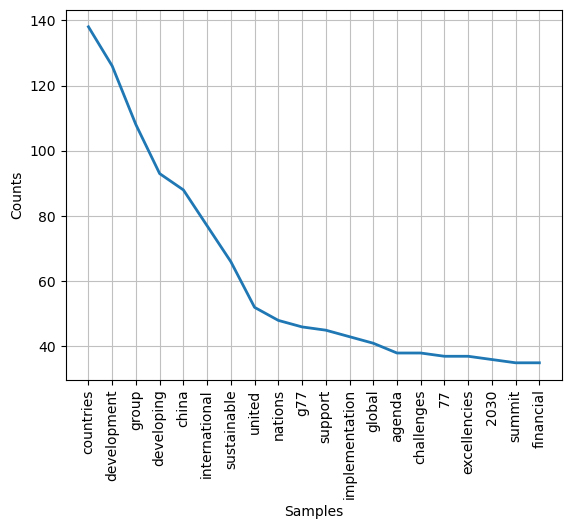

<Axes: xlabel='Samples', ylabel='Counts'>

In [4]:
with open("G77_2024.txt", "r") as file:
    content = file.read()

tokens = word_tokenize(content)
stopwords = nltk.corpus.stopwords.words("english")
punctuation = string.punctuation

filtered_list = [word.lower() for word in tokens if word.lower() not in stopwords and word not in punctuation]
fdist = FreqDist(filtered_list)
fdist.plot(20)

4. Here is a link to a speech made by President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trumps speech only, remove stopwords and perform a word frequency distribution and visualize it. 

In [5]:
url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser") 
    paragraphs = soup.find_all("p")
    start = 10
    speech_paragraphs = paragraphs[start:len(paragraphs)-2]
    speech_text = "\n".join([paragraph.text for paragraph in speech_paragraphs if "(Audience" not in paragraph.text])
else:
    print(f"Failed to retrieve content: HTTP {response.status_code}")

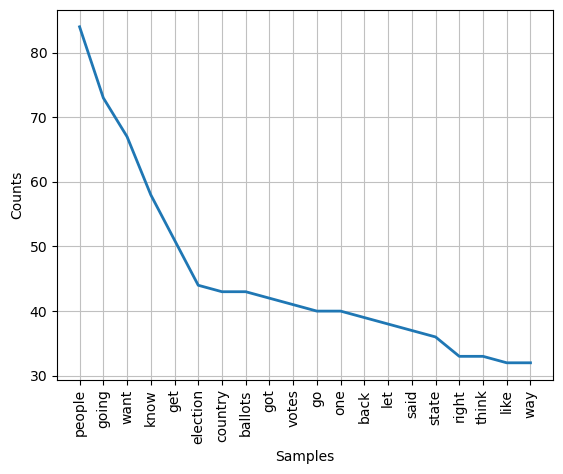

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
speech_stopwords = stopwords + ["'s", "n't", "'re", "'ve", "'ll", "``", "''", "--"]

speech_tokens = word_tokenize(speech_text)
speech_filtered_list = [word.lower() for word in speech_tokens if word.lower() not in speech_stopwords and word not in punctuation]

fdist1 = FreqDist(speech_filtered_list)
fdist1.plot(20)

5. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt

What are the 10 most common things Donald Trump "loves?"



In [7]:
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
if response.status_code == 200:
    trump_text = response.content.decode('utf-8')
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize text and process sentences containing "I love"
trump_sentences = sent_tokenize(trump_text)
trump_loves_cleaned = []
for sentence in trump_sentences:
    if "i love" in sentence.lower():
        parts = re.split(r'[^\w\s]|and', sentence.lower())
        for part in parts:
            if 'love' in part:
                index = part.find('love') + len('love')
                extracted_info = part[index:].strip()
                doc = nlp(extracted_info)
                filtered_tokens = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.text.lower() not in stopwords]
                filtered_text = ' '.join(filtered_tokens)
                if filtered_text:
                    trump_loves_cleaned.append(filtered_text)

# Output cleaned phrases and top 10 word counts
word_counts = Counter(trump_loves_cleaned)
top_10_words = word_counts.most_common(10)
for word, count in top_10_words:
    print(f"{word.capitalize()}: {count} times")

People: 12 times
China: 5 times
Mexico: 4 times
Place: 3 times
Florida: 3 times
Hispanics: 3 times
Country: 2 times
Polls: 2 times
Universe: 2 times
Area: 2 times


6. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?

In [8]:
country_dict = {country.name.lower(): 0 for country in pycountry.countries}

speech_stopwords = speech_stopwords + ["–", "’"]

trump_tokens = word_tokenize(trump_text)
trump_filtered_list = [word.lower() for word in trump_tokens if word.lower() not in speech_stopwords and word not in punctuation]

for word in trump_filtered_list:
    if word in country_dict.keys():
        country_dict[word] += 1

trump_countries = Counter(country_dict)
trump_countries.pop('america', None)
trump_countries.pop('united states of america', None)

top_5_countries = trump_countries.most_common(5)
for country, count in top_5_countries:
    print(f"{country.capitalize()}: {count} times")

China: 201 times
Mexico: 159 times
Israel: 83 times
Iraq: 72 times
Japan: 67 times


In class we talked about sentence tokenizers that could be useful in determining when sentences might be repeated. One application we discussed was in political speeches, when certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses:
"Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association.
These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."


7. Perform a frequency analysis that provides evidence for the assertion made in the Vox article. 

Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!


In [9]:
unigrams = trump_filtered_list
"""
Create bigrams by pairing each element with its subsequent element

'[:-1]' excludes the last item from the first part of the pair
'[1:]' starts from the second item to include in the second part of the pair
'zip' function pairs up elements from these two lists to form bigrams
"""
bigrams = [b for b in zip(unigrams[:-1], unigrams[1:])]
trigrams = [t for t in zip(unigrams[:-2], unigrams[1:-1], unigrams[2:])]
sentences = sent_tokenize(trump_text)

tokenized_data = {
    'unigrams': unigrams,
    'bigrams': bigrams,
    'trigrams': trigrams,
    'sentences': sentences
}

token_counts = {approach: Counter(variable) for approach, variable in tokenized_data.items()}

for approach, counts in token_counts.items():
    print(f"Most common tokens in {approach}:")
    print(counts.most_common(10))
    print()

Most common tokens in unigrams:
[('going', 2055), ('people', 1336), ('know', 1315), ('said', 773), ('want', 760), ('great', 687), ('get', 633), ('like', 627), ('think', 625), ('one', 592)]

Most common tokens in bigrams:
[(('united', 'states'), 117), (('hillary', 'clinton'), 101), (('going', 'happen'), 100), (('going', 'get'), 97), (('going', 'win'), 95), (('going', 'make'), 93), (('think', 'going'), 76), (('take', 'care'), 69), (('years', 'ago'), 65), (('make', 'america'), 65)]

Most common tokens in trigrams:
[(('make', 'america', 'great'), 48), (('going', 'take', 'care'), 39), (('going', 'build', 'wall'), 20), (('going', 'happen', 'going'), 20), (('make', 'country', 'great'), 19), (('thank', 'thank', 'much'), 18), (('going', 'make', 'america'), 18), (('thank', 'much', 'everybody'), 17), (('going', 'pay', 'wall'), 17), (('going', 'bring', 'back'), 17)]

Most common tokens in sentences:
[('Okay?', 117), ('Right?', 102), ('Thank you.', 64), ('Believe me.', 27), ('It’s true.', 24), ('Th

<span style="color:blue"> 
  The results of tokenizing by unigrams show the verbs that were most frequently used in his speeches. The results of tokenizing by bigrams highlight Trump's strategy of attacking Hillary Clinton, comparing to the past, and envisioning the future. The results of tokenizing by trigrams highlight Trump's slogans of "Make America Great Again" and "Build the Wall." The results of tokenizing by whole sentences highlight Trump's linguistic characteristics. Trump is good at establishing a casual relationship with his audience, as the most frequent sentences in his speeches are conversational in nature, rather than mere statements and facts. These frequently used sentences convey his urgency for the audience to trust him, supporting Lakoff's statement that Trump often uses these immediately after making baseless or untrue statements.
</span>

8.Sentiment Analysis
Sentiment analysis, also known as opinion mining or emotion AI, is a field of natural language processing (NLP) that focuses on identifying and categorizing opinions or sentiments expressed within text data. The primary goal is to determine the writer's or speaker's attitude towards a particular topic, product, service, or overall context. This attitude can range from positive, negative, to neutral, and may also encompass more nuanced emotions like happiness, anger, sadness, quantitative or emotional.


The most basic form of sentiment analysis assigns values to words based on a dictionary of words, from neutral to slightly positive or negative, moderately positive or negative, and extremely positive or negative. Vader is a popular package that analyzes sentiment.

In [10]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


This will compute a compound score by summing the valence scores of each word int he lexicon and then bnormalized between -1 (most negative) and +1 most positive. This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a "normalize, weighted composite score" is accurate.

let's test opur first sentiment using VADER. VADER is great on social media data which can be messy and contain emojis.
We will use the polarity_scores( ) method to obtain the polarity indices.

In [11]:
sentence = "I love that movie!"
score = analyzer.polarity_scores(sentence)
print(score)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


In [12]:
sentence2 = "OMG, this job totally SUX!!"
score = analyzer.polarity_scores(sentence2)
print(score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.6261}


In [13]:
sentence3 = '😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence3)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}


In [14]:
sentence4 = '😀 😀 😀 😀 😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence4)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.8885}


The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents:

Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf

Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf

July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf

Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf

Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process. 
1. Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.
2. Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?
3. Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.
4. Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?
5. Add key makers to your visualization that bring in the key events of 2008.

In [15]:
def are_first_two_words_uppercase(text):
    """
    Check if the first two words of a text are uppercase. This function splits the input text into words
    and checks the case of the first two words, returning True if both are uppercase, otherwise False.
    
    Args:
        text (str): The input text to check.
        
    Returns:
        bool: True if the first two words are uppercase, False otherwise.
    """
    words = text.split()
    if len(words) >= 2:
        return words[0].isupper() and words[1].isupper()
    return False
    
def extract_speakers(text):
    """
    Extracts the speaker's name from a given text. This function uses regular expressions to identify
    speaker names that follow specific patterns, such as those prefixed with "MR." or "MS.".
    If the text doesn't start with these prefixes, it searches for any sequence of uppercase letters
    and spaces at the beginning of the text. The first found speaker name is returned.
    
    Args:
        text (str): The input text containing the speaker's name.
        
    Returns:
        str: The extracted speaker's name, or an empty string if no speaker name is found.
    """
    if text.split(".")[0] in ['MR', 'MS']:
        speakers = re.findall(r'^[A-Z]+\.\s[A-Z]+\s?[A-Z]*', text, re.MULTILINE)
    else:
        speakers = re.findall(r'^[A-Z ]+', text, re.MULTILINE)
    return speakers[0] if speakers else ''


In [16]:
def process_pdf(file_path):
    """
    Process a PDF file and extract speech list and dictionary.
    
    Args:
        file_path (str): The path to the PDF file.
        
    Returns:
        tuple: A tuple containing a set of unique speakers, a combined text of all speeches, and a dictionary mapping speakers to their respective speeches.
    """
    document = fitz.open(file_path)
    text = ""
    
    # Iterate over each page starting from the third page to gather text
    for page_num in range(2, len(document)):
        page = document.load_page(page_num)
        text += page.get_text()
    
    paragraphs = text.replace("\n\n", "\n").split("\n")

    # Filter out paragraphs that are likely headers or footers
    date = paragraphs[1].strip()
    filtered_list = [s for s in paragraphs if date not in s and f"of {len(document)}" not in s and s.strip()]
    filtered_list.pop(0)

    speech_list = []
    speech = "" 
    for item in filtered_list:
        # Check for a new speaker by looking for uppercase first two words
        if are_first_two_words_uppercase(item):
            if speech.strip():  # If there's an ongoing speech, save it before starting a new one
                speech_list.append(speech.strip())
            speech = item  # Start a new speech
        else:
            speech += " " + item  # Continue adding to the current speech
    
    for i in range(len(speech_list)):
        speech_list[i] = speech_list[i].replace("  ", " ")

    # Extract speakers from each speech and create a unique set of speakers
    speaker_list = [extract_speakers(speech) for speech in speech_list]
    speaker_set = set(speaker_list)

    # Initialize a dictionary to hold speeches keyed by speaker
    speech_dict = {speaker: "" for speaker in speaker_set}
    for speech in speech_list:
        speaker = extract_speakers(speech)
        speech_new = speech.replace(speaker + '. ', '')
        if speech_dict[speaker]:
            speech_dict[speaker] += " " + speech_new.strip()
        else:
            speech_dict[speaker] += speech_new.strip()
            
    # Combine all speeches into a single text paragraph for output
    combined_speeches = " ".join(speech_dict.values())
    
    return speaker_set, combined_speeches, speech_dict

#### Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.

FOMC20080121confcall.pdf


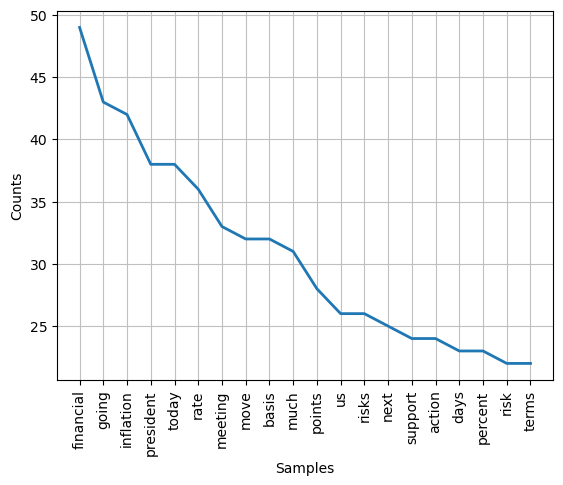

FOMC20080310confcall.pdf


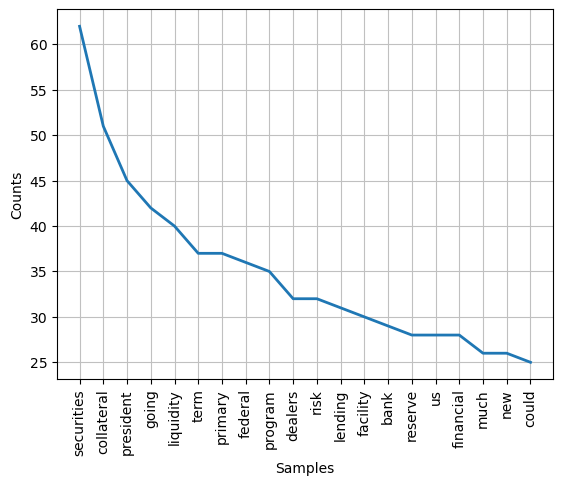

FOMC20080724confcall.pdf


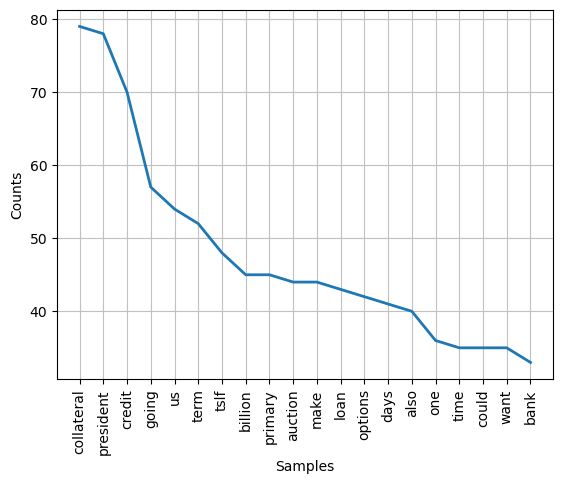

FOMC20080929confcall.pdf


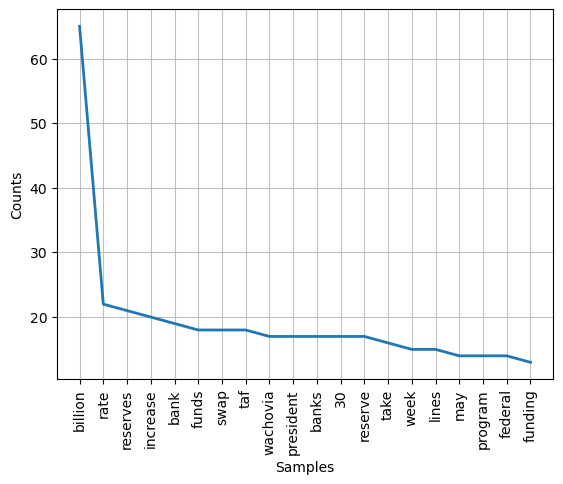

FOMC20081007confcall.pdf


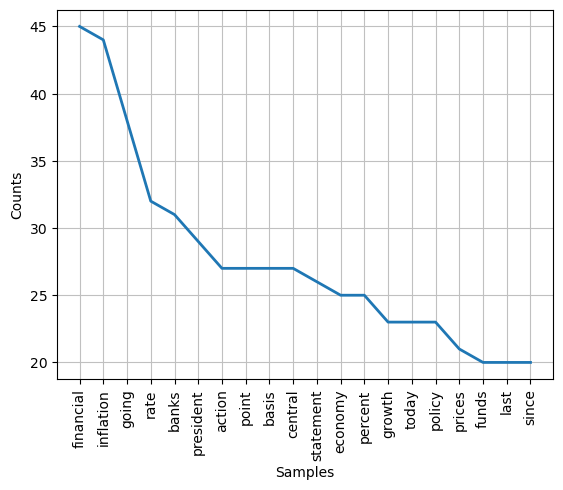

In [17]:
def analyze_word_frequency_for_files(file_name):
    """
    Analyzes and plots the frequency of non-stop words in a PDF file.
    Parameters:
    - file_name (str): Path to the PDF file.
    Outputs:
    - A plot of the top 20 most frequent non-stop words in the file.
    """
    speaker_set, combined_speeches, speech_dict = process_pdf(file_name)
    
    words_list = [word.lower() for speaker in speaker_set for word in speaker.split()]
    stopwords_new = stopwords + words_list + ['’', 'thank', 'yes', 'would', 'think', 'markets', 'market']
    
    tokens = word_tokenize(combined_speeches)
    text_filtered_list = [word.lower() for word in tokens if word.lower() not in stopwords_new and word not in punctuation]

    fdist1 = FreqDist(text_filtered_list)
    # print(fdist1.most_common(20))
    fdist1.plot(20)
    
pdf_files = ["FOMC20080121confcall.pdf", "FOMC20080310confcall.pdf", 
             "FOMC20080724confcall.pdf", "FOMC20080929confcall.pdf", 
             "FOMC20081007confcall.pdf"]

for file in pdf_files:
    print(file)
    analyze_word_frequency_for_files(file)

<span style="color:blue"> 
January 21, 2008: Keywords 'financial' and 'inflation' show discussions centered on financial stability and inflation concerns. March 10, 2008: 'Securities', 'collateral', 'liquidity', 'federal', and 'program' indicate the Fed's focus on introducing liquidity-enhancing programs. 'Securities' and 'collateral' suggest a focus on the quality and types of assets in Fed operations. July 24, 2008: Similar keywords and the mention of the Term Securities Lending Facility (TSLF) highlight the continuation of discussions on supporting market functioning. September 29, 2008: The call mentions 'Wachovia', a financial institution in acute distress, with keywords emphasizing actions to bolster bank reserves, manage interest rates, and expand international swap lines for global dollar liquidity. October 7, 2008: The less detailed keywords imply potential economic improvement.
</span>

#### Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?

In [18]:
def analyze_similar(pdf_files, target, threshold):
    """
    Analyzes and prints sentences from speeches in a series of PDF files that are similar to a target sentence.
    
    Args:
        pdf_files (list): A list of paths to PDF files.
        target (str): Target sentence for similarity comparison.
    """
    target_doc = nlp(target)
    target_vector = target_doc.vector
    
    similar_sentences = []

    for file_name in pdf_files:
        speaker_set, combined_speeches, speech_dict = process_pdf(file_name)
        
        for text in speech_dict.values():
            speech_sentences = sent_tokenize(text)
            
            for sentence in speech_sentences:
                doc = nlp(sentence)
                sentence_vector = doc.vector

                similarity_score = np.dot(target_vector, sentence_vector) / (np.linalg.norm(target_vector) * np.linalg.norm(sentence_vector))
                if similarity_score > threshold:
                    similar_sentences.append(sentence)
        
    for sentence in similar_sentences:
        print(f"- {sentence}")

pdf_files = [
    "FOMC20080121confcall.pdf",
    "FOMC20080310confcall.pdf",
    "FOMC20080724confcall.pdf",
    "FOMC20080929confcall.pdf",
    "FOMC20081007confcall.pdf"
]

target = "What the US and the world are going through is unlike anything that has ever been experienced before."
analyze_similar(pdf_files, target, 0.65)

- Of course, the inflation numbers haven’t been all that I might have hoped for, and even core inflation has been running a little higher than I thought it would.
- Do we know at all what the ECB and the Bank of England are considering given that the markets were open and they are the ones who have seen markets and know what is going on there today?
- The prices that were out there were just being driven by fear.
- That has been set, and no further action would be required for this modification to the TAF.
- It is just that the collateral hasn’t been pledged at the window.
- It is frequently pointed out by the banks that the ECB and the Bank of England have been making effective use of longer-term loans, and in their view that has made the liquidity pressures less severe in those jurisdictions.
- To facilitate that purchase, the Board invoked the systemic risk exception, which has not been done before.
- That apparently isn’t going to happen or didn’t happen in the third quarter as mea

<span style="color:blue"> 
I used the vector-based approach and iterated through all the sentences to find sentences with similar meanings. I set the threshold for the similarity score at 0.65. Among the sentences, the phrase 'driven by fear' from 'The prices that were out there were just being driven by fear,' 'which has not been done before' from 'To facilitate that purchase, the Board invoked the systemic risk exception, which has not been done before,' and 'reassessment of the value of every asset everywhere in the world,' along with 'has certainly gone beyond that' from 'I think the best way to view financial markets is to say that what’s fundamentally going on is a reassessment of the value of every asset everywhere in the world, and what might have been triggered by housing has certainly gone beyond that,' suggest that the Fed understands the US and the world are going through an unprecedented experience.
</span>

#### Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up getting.

In [19]:
target = "The situation could be quickly remedied and would not get as bad as it ended up getting."
analyze_similar(pdf_files, target, 0.65)

- The TAF actually appears to have done its work pretty well, and the need for the TAF may be diminishing.
- Of course, the inflation numbers haven’t been all that I might have hoped for, and even core inflation has been running a little higher than I thought it would.
- The desire is to intervene, to get the market rates down, and to bring confidence; but then our ability to pull out of that is compromised because we can’t be sure in an uncertain world of how strongly the economy might be coming out of something.
- I do not wish to be dissenting on this, as troubled as I am about it.
- We cannot wait until inflation is down before we begin to act.
- With the economy slowing and with oil prices likely to moderate, the best guess is that inflation will be well controlled going forward.
- This is a fine piece of work that took an awful lot to put together, but it would be helpful at least to me and I think it would be helpful to the Committee if we knew where these different branches wou

<span style="color:blue"> 
I still set the threshold for the similarity score at 0.65. The statements 'The TAF actually appears to have done its work pretty well, and the need for the TAF may be diminishing' and 'With the economy slowing and with oil prices likely to moderate, the best guess is that inflation will be well controlled going forward' suggest that the situation could be quickly remedied and would not become as severe as it eventually did. However, I think in this case, this approach does not work as well as the previous one.
</span>

#### Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?

In [20]:
def analyze_sentiment_for_files(file_name):
    """
    Analyze sentiment for a single PDF file.
    
    Parameters:
    - file_name (str): The name of the PDF file.
    
    Returns:
    - sentiment_scores_dict (dict): A dictionary where keys are speaker names and values are sentiment scores.
    """
    sentiment_scores_dict = {}

    speaker_set, combined_speeches, speech_dict = process_pdf(file_name)
    for speaker, speech in speech_dict.items():
        sentences_score = analyzer.polarity_scores(speech)
        sentiment_scores_dict[speaker] = sentences_score

    return sentiment_scores_dict

In [21]:
pdf_files = ["FOMC20080121confcall.pdf", "FOMC20080310confcall.pdf", 
             "FOMC20080724confcall.pdf", "FOMC20080929confcall.pdf", 
             "FOMC20081007confcall.pdf"]

sentiment_scores_for_files = []

for file in pdf_files:
    sentiment_scores_for_file = analyze_sentiment_for_files(file)
    sentiment_scores_for_files.append(sentiment_scores_for_file)

dfs = []
for i, sentiment_scores in enumerate(sentiment_scores_for_files):
    df = pd.DataFrame.from_dict(sentiment_scores, orient='index')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Speaker'}, inplace=True)
    df['Date'] = pd.to_datetime(pdf_files[i][4:12], format='%Y%m%d')
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)
speaker_counts = df_combined['Speaker'].value_counts()
filtered_speakers = speaker_counts[speaker_counts == 5].index
filtered_df = df_combined[df_combined['Speaker'].isin(filtered_speakers)]

print(filtered_df)

                   Speaker    neg    neu    pos  compound       Date
4               MS. DANKER  0.056  0.767  0.177    0.9875 2008-01-21
5               MR. DUDLEY  0.066  0.847  0.087    0.9788 2008-01-21
6            MR. ROSENGREN  0.210  0.674  0.116   -0.8713 2008-01-21
7                MR. EVANS  0.038  0.792  0.170    0.9559 2008-01-21
9   VICE CHAIRMAN GEITHNER  0.108  0.802  0.090   -0.7760 2008-01-21
11             MR. PLOSSER  0.073  0.834  0.094    0.9401 2008-01-21
12              MR. LACKER  0.037  0.856  0.107    0.9515 2008-01-21
14       CHAIRMAN BERNANKE  0.082  0.785  0.133    0.9994 2008-01-21
17              MS. YELLEN  0.131  0.697  0.172    0.8575 2008-01-21
20              MS. DANKER  0.000  0.427  0.573    0.9971 2008-03-10
21               MR. EVANS  0.035  0.799  0.166    0.9947 2008-03-10
24              MS. YELLEN  0.081  0.782  0.137    0.9119 2008-03-10
26             MR. PLOSSER  0.064  0.835  0.101    0.9739 2008-03-10
28              MR. DUDLEY  0.072 

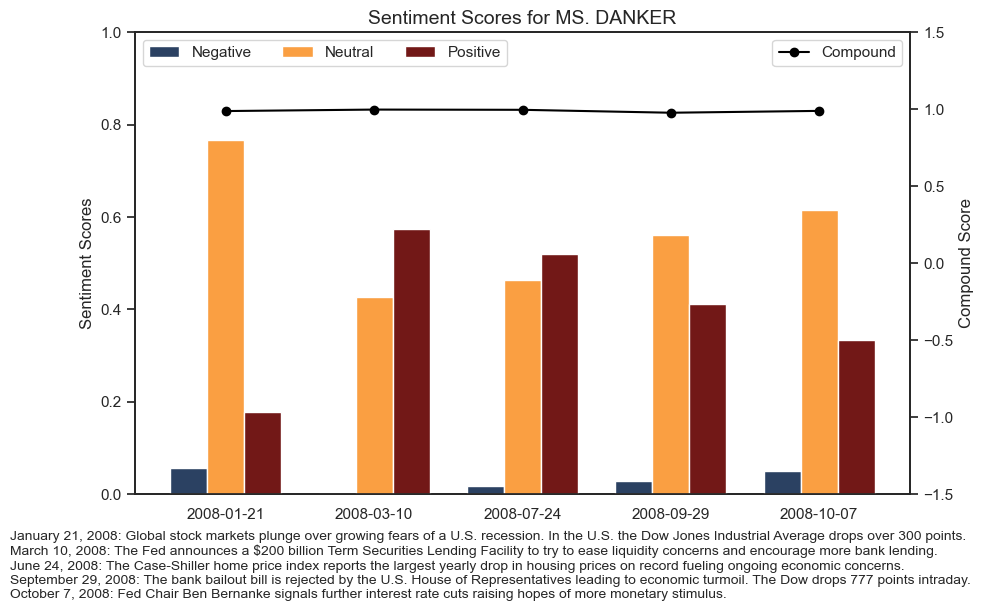

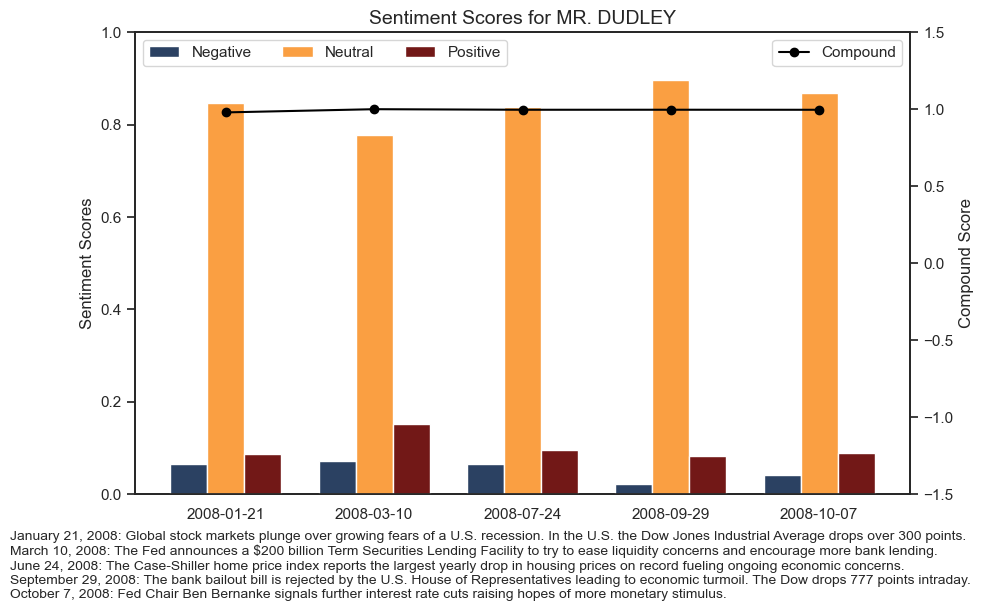

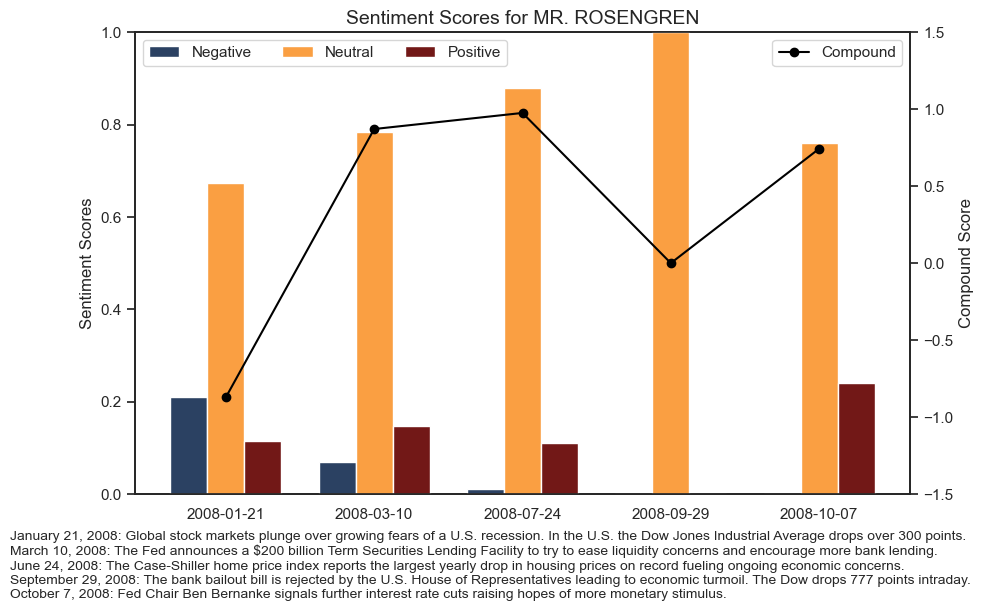

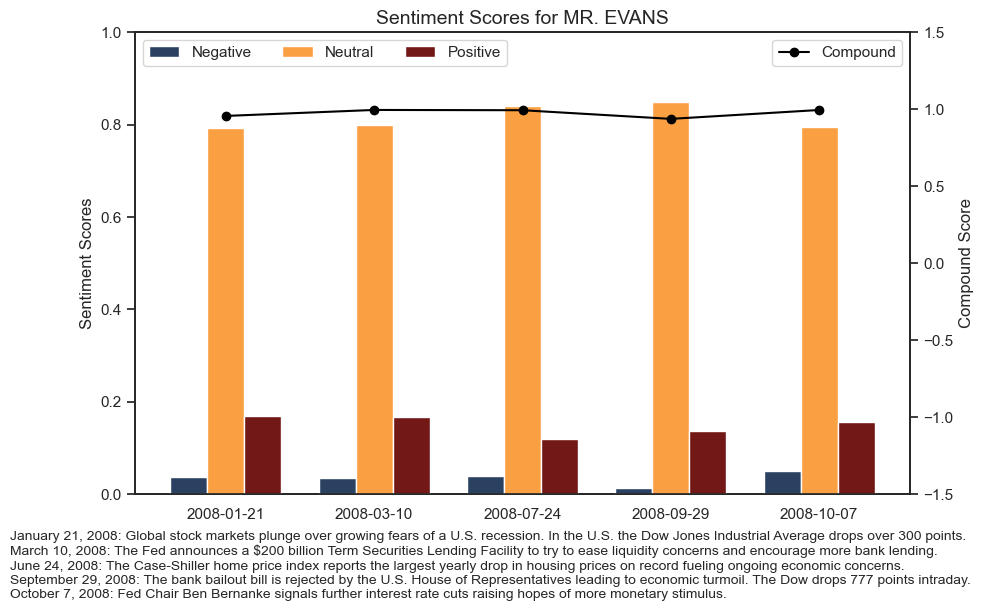

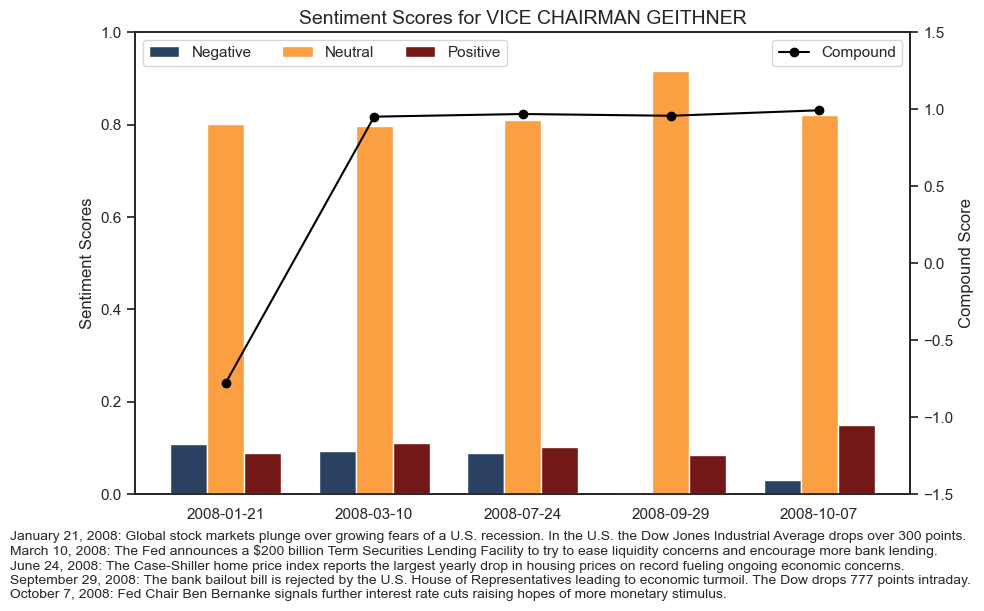

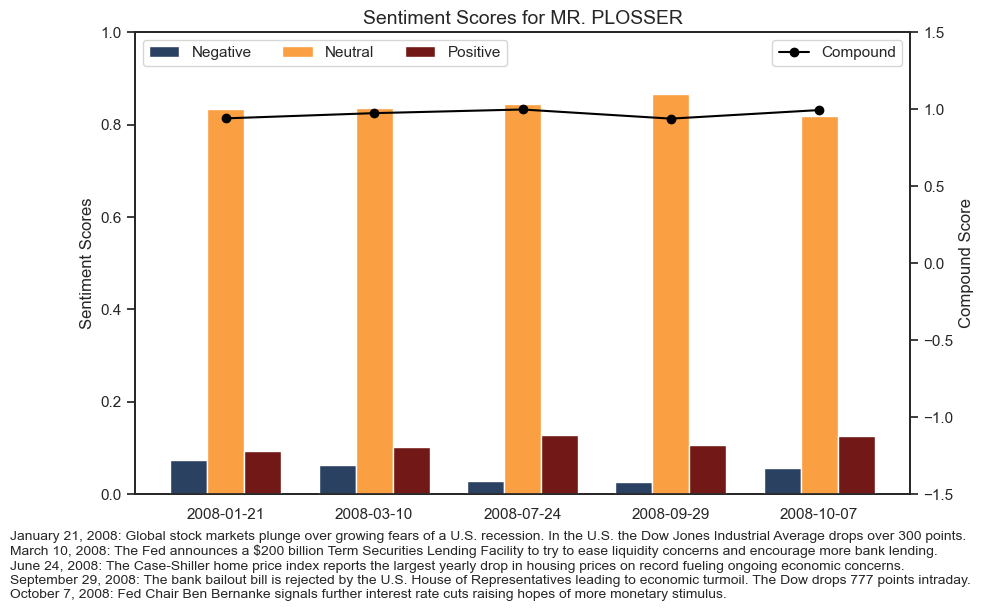

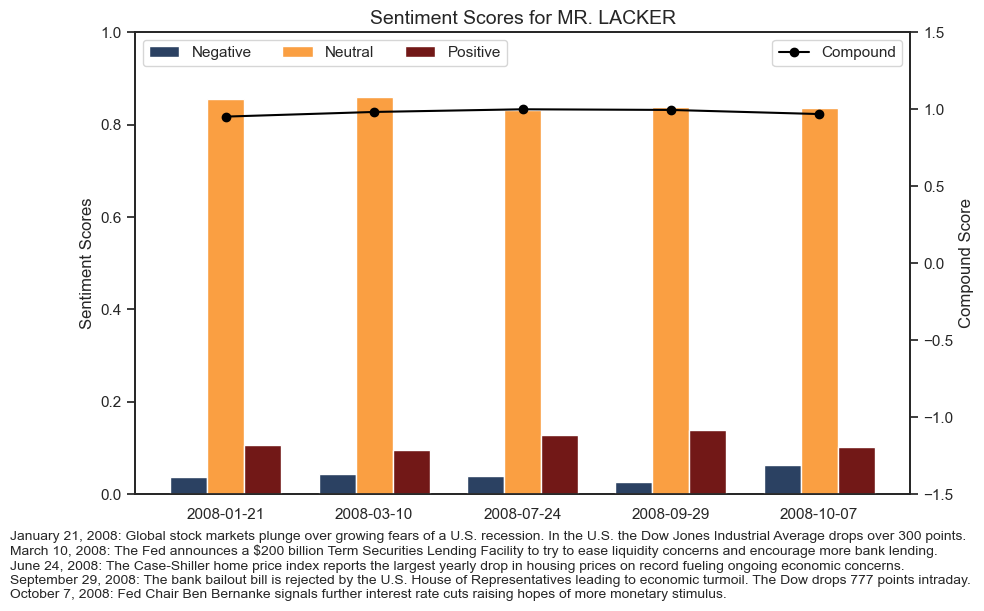

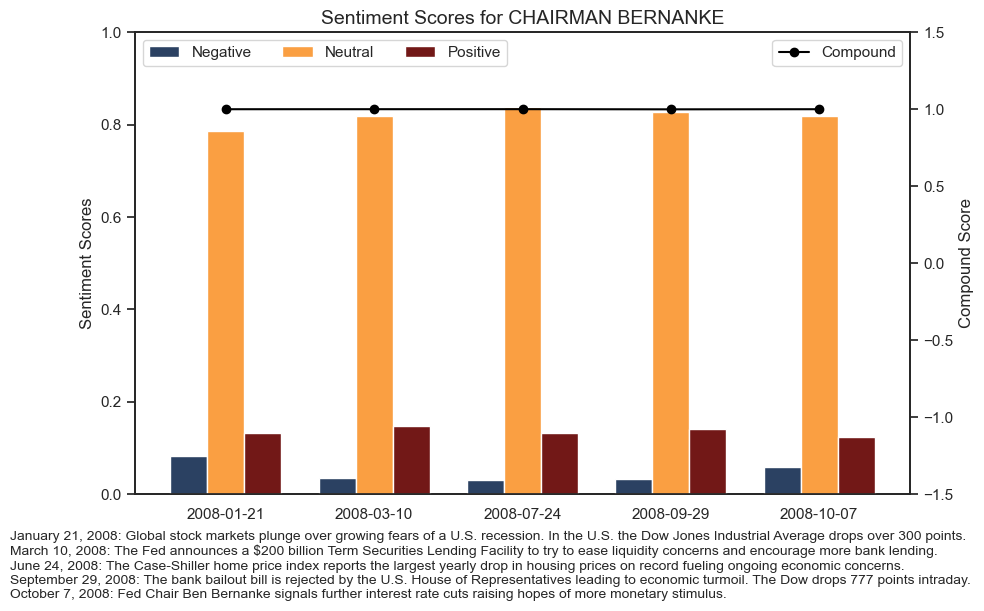

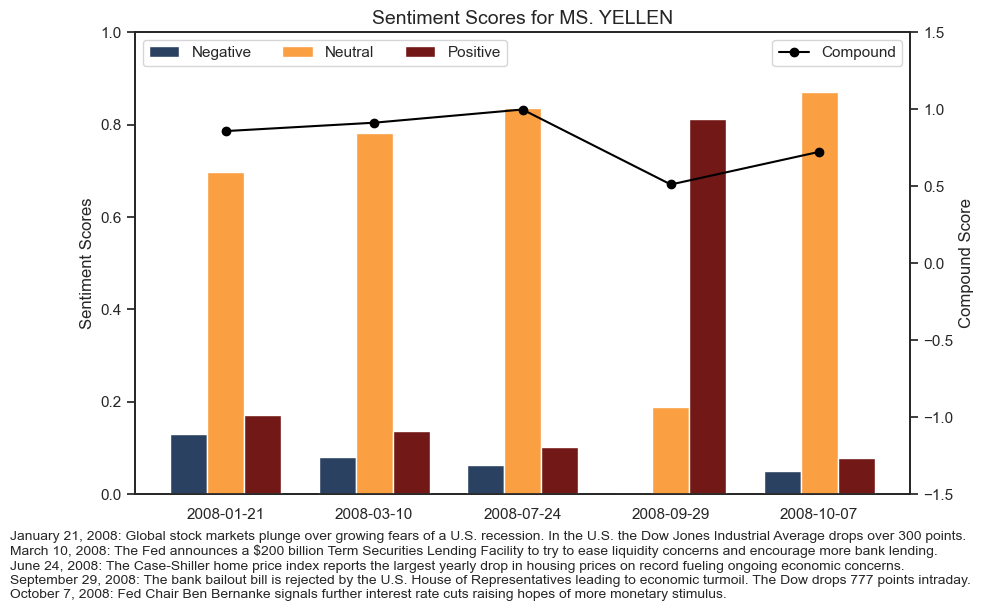

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white")

def plot_speaker(input_data): 
    unique_speakers = input_data['Speaker'].unique()

    for speaker in unique_speakers:
        df = input_data[input_data['Speaker'] == speaker].set_index('Date')
        fig, ax1 = plt.subplots(figsize=(10, 6))
            
        x = np.arange(len(df))
        width = 0.25 
            
        ax1.bar(x - width, df['neg'], width, label='Negative', color='#2b4162', zorder=3)
        ax1.bar(x, df['neu'], width, label='Neutral', color='#fa9f42', zorder=3)
        ax1.bar(x + width, df['pos'], width, label='Positive', color='#721817', zorder=3)
            
        ax1.set_ylabel('Sentiment Scores', fontsize=12)
        ax1.set_xticks(x)
        ax1.set_xticklabels(df.index.strftime('%Y-%m-%d'))
        ax1.legend(loc='upper left', ncols=3)
        ax1.set_ylim(0, 1)
        
        ax2 = ax1.twinx()
        ax2.plot(x, df['compound'], label='Compound', color='black', marker='o', linestyle='-', zorder=1)
        ax2.set_ylabel('Compound Score', fontsize=12)
        ax2.legend(loc='upper right', ncols=3)
        ax2.set_ylim(-1.5, 1.5)

        ax1.set_title('Sentiment Scores for ' + speaker, fontsize=14)
        
        caption = (
        "January 21, 2008: Global stock markets plunge over growing fears of a U.S. recession. In the U.S. the Dow Jones Industrial Average drops over 300 points. \n"
        "March 10, 2008: The Fed announces a $200 billion Term Securities Lending Facility to try to ease liquidity concerns and encourage more bank lending. \n"
        "June 24, 2008: The Case-Shiller home price index reports the largest yearly drop in housing prices on record fueling ongoing economic concerns. \n"
        "September 29, 2008: The bank bailout bill is rejected by the U.S. House of Representatives leading to economic turmoil. The Dow drops 777 points intraday. \n"
        "October 7, 2008: Fed Chair Ben Bernanke signals further interest rate cuts raising hopes of more monetary stimulus."
        )

        fig.text(0, 0.05, caption, ha='left', va='top', fontsize=10, wrap=True)

        plt.show()
        
plot_speaker(filtered_df)


<span style="color:blue"> 
If I were to count all the participants who have ever attended the conference calls, the number would be too many. To identify the key participants, I retained those who have spoken at least once in all five meetings in my sample. From the graphs, we can see that most people do not actually hold such negative attitudes towards the Great Recession. These compound scores are all around one. Mr. Rosengren, Vice Chairman Geithner, and Ms. Yellen are the ones who had the most negative opinions and who changed their attitudes the most over time. However, I acknowledge some problems in this analysis. For instance, the bars for Ms. Yellen look strange on 2008-09-29 because she only spoke one sentence, 'Fine, thank you,' in the whole call.
</span>

#### Add key makers to your visualization that bring in the key events of 2008.

<span style="color:blue"> 
Because I represented each speaker as a graph, I chose to incorporate the key events of 2008 into the caption. These key events are actually consistent with the word frequency analysis conducted earlier. From the graphs, it can be observed that people tended to be more negative on 2008-09-29, likely because that was the time when the Great Recession had the largest impact on the economy. After that, people's attitudes became more positive as the economy began to improve. The reason why the attitude remained stable for the first three calls might be because of the programs that the Fed invested in.
</span>

9. Sentiment analysis is not a perfect science, especially when you are using off-the-shelf packages like VADER. Given what you know about the crisis, do you trust Vader's sentiment analysis? Why or why not?

<span style="color:blue"> 
I do not think we should trust VADER's sentiment analysis. First, the analysis does not adjust for the number of words a speaker spoke, as illustrated by Ms. Yellen's case mentioned above. Second, VADER may not fully capture irony, sarcasm, or technical jargon uncommon in its training data. Additionally, VADER provides scores for sentiment polarity and intensity. Given these are official transcripts of conference calls, it is challenging to detect speakers' true emotions. For this reason, VADER might work better for tweets and blog posts. Considering the seriousness of the Great Recession, I believe the attitudes should be predominantly negative. I suspect the positive attitude observed may stem from people trying to remain polite during the conference calls.
</span>


10. Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?

Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [23]:
pdf_files = ["FOMC20131016confcall.pdf"]

sentiment_scores_for_files = []

for file in pdf_files:
    sentiment_scores_for_file = analyze_sentiment_for_files(file)
    sentiment_scores_for_files.append(sentiment_scores_for_file)

dfs = []
for i, sentiment_scores in enumerate(sentiment_scores_for_files):
    df = pd.DataFrame.from_dict(sentiment_scores, orient='index')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Speaker'}, inplace=True)
    df['Date'] = pd.to_datetime(pdf_files[i][4:12], format='%Y%m%d')
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)
speaker_counts = df_combined['Speaker'].value_counts()
filtered_speakers = speaker_counts[speaker_counts == 1].index
filtered_df = df_combined[df_combined['Speaker'].isin(filtered_speakers)]
filtered_df = filtered_df[filtered_df['Speaker'] != 'T']

print(filtered_df)

                 Speaker    neg    neu    pos  compound       Date
0             MR. FISHER  0.028  0.870  0.102    0.9960 2013-10-16
1           MS. PIANALTO  0.058  0.862  0.080    0.6387 2013-10-16
2             MR. POWELL  0.118  0.761  0.121   -0.6939 2013-10-16
3              MR. EVANS  0.017  0.856  0.127    0.9925 2013-10-16
4             MR. POTTER  0.060  0.815  0.125    0.9984 2013-10-16
5             MS. YELLEN  0.014  0.894  0.092    0.9517 2013-10-16
6           MR. WILLIAMS  0.036  0.845  0.119    0.9689 2013-10-16
7              MS. IHRIG  0.000  1.000  0.000    0.0000 2013-10-16
9             MS. GEORGE  0.008  0.836  0.156    0.9826 2013-10-16
10          MR. LOCKHART  0.000  0.901  0.099    0.8992 2013-10-16
11      MR. KOCHERLAKOTA  0.044  0.795  0.161    0.9994 2013-10-16
12  VICE CHAIRMAN DUDLEY  0.023  0.873  0.105    0.9985 2013-10-16
13            MS. RASKIN  0.000  0.920  0.080    0.6361 2013-10-16
14         MS. ROBERTSON  0.069  0.843  0.089    0.9719 2013-1

<span style="color:blue"> 
Above, I attempted to analyze the call from October 16, 2013, but discovered that the compound scores were similar to those from the calls in 2018. However, it is certain that people held negative views during the Great Recession. Therefore, we cannot conclusively determine whether a low or negative compound score reflects a negative sentiment from the Fed in 2008.
</span>

<span style="color:blue"> 
I also acknowledged that the functions I defined heavily depended on the format of the PDF files for the calls in 2008. Hence, I would have had to rewrite everything, which I ultimately did not do because the content for this call actually starts on page 4. Additionally, these functions cannot be applied to the format of the meeting minutes other than the conference calls on the website. I hope to make the functions more dynamic and capable of adjusting to different PDF file formats more flexibly.
</span>